svm regression linear

c:\Anaconda\envs\pytorch\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


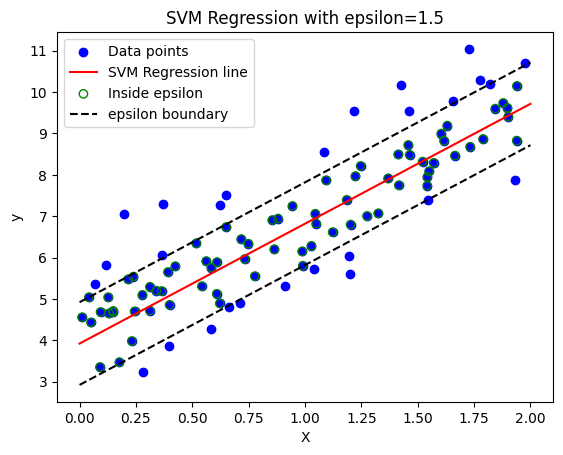

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 生成数据集
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.ravel() + np.random.randn(100)  # y = 4 + 3*X + 噪声

# 创建SVM回归模型
epsilon = 1
svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=epsilon, random_state=42))
svm_reg.fit(X, y)

# 预测
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = svm_reg.predict(X_new)

# 计算训练集上的预测值
y_train_pred = svm_reg.predict(X)

# 找出epsilon范围内的点
inside_epsilon = np.abs(y - y_train_pred) <= epsilon

# 绘图
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred, color='red', label='SVM Regression line')
plt.scatter(X[inside_epsilon], y[inside_epsilon], facecolors='none', edgecolors='green', label='Inside epsilon')

# 绘制epsilon边界线
plt.plot(X_new, y_pred + epsilon, 'k--', label='epsilon boundary')
plt.plot(X_new, y_pred - epsilon, 'k--')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('SVM Regression with epsilon=1.5')
plt.show()
